# Printable colors demo
In this notebook we construct a demo for the printable colors rule


In [6]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import Image as iImage

# hacky path usage to get vislint imported correctly
import sys
sys.path.append('../../lint_rules')
sys.path.append('../../')
from vislint import vislint

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

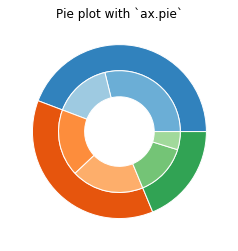

In [2]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.savefig('color-sunburst.png')
plt.show()


In [3]:
vislint(ax, fig, {"representation-invariance": 0.01})

[0.44, 0.47, 0.47, 0.62, 0.75, 0.65, 0.75, 0.64, 0.76]


[('require-axes', 'Axes must be labeled'),
 ('require-legend', 'A legend must be used'),
 ('no-pie', 'Pie charts are not allowed'),
 ('maximum-pie-pieces',
  'This pie chart has more than the allowed number of wedges'),
 ('no-radial', 'Radial charts are not allowed'),
 ('max-colors', 'Too many colors'),
 ('printable-colors', 'Colors must be printable')]

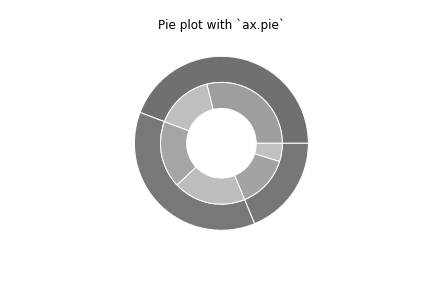

In [7]:
img = Image.open('color-sunburst.png').convert('LA')
img.save('greyscale-sunburst.png')
iImage("greyscale-sunburst.png")